## PCA

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

sns.set_style('whitegrid')

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T # T == transpose

X.shape

(200, 2)

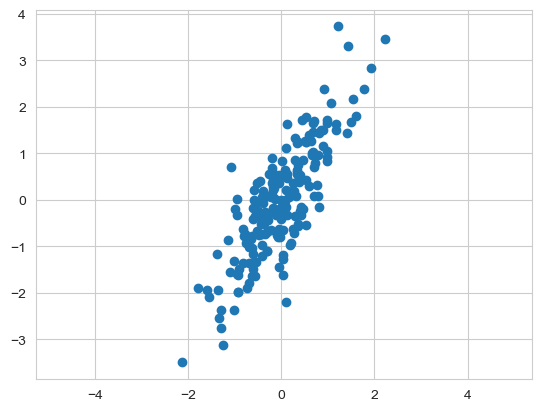

In [2]:
plt.scatter(X[:,0], X[:, 1])
plt.axis('equal'); # x축과 y축 같은 간격 표시

In [3]:
# PCA fitting

pca = PCA(n_components=2, random_state=13)
pca.fit(X)

PCA(n_components=2, random_state=13)

In [4]:
# pca 벡터

pca.components_

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [5]:
# pca 분산
# components 각 행의 설명도라고 보면 됨.

pca.explained_variance_

array([1.82531406, 0.13209947])

In [6]:
# pca 분산 %화

pca.explained_variance_ratio_

array([0.93251326, 0.06748674])

In [7]:
# 벡터를 그리기 위한 함수 선언

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2, color='black',
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

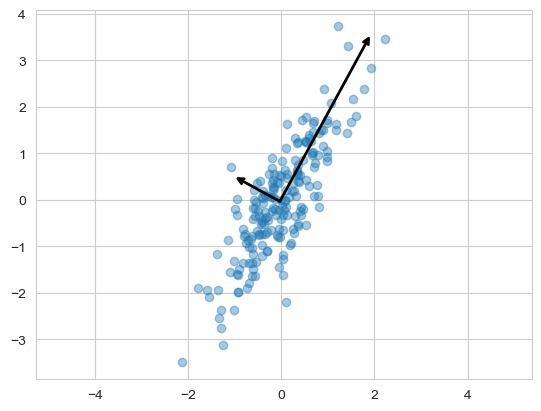

In [8]:
# 벡터 그리기

plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length) # 3은 임의의 숫자, 다른 도메인에서는 적정한 숫자를 찾는 것이 필요
    draw_vector(pca.mean_, pca.mean_ + v) # pca.mean_ 데이터 중심 좌표라고 생각하면 됨
plt.axis('equal')
plt.show()

In [9]:
# n_components 1로 두고 pca fitting

pca = PCA(n_components=1, random_state=13)
pca.fit(X)
X_pca = pca.transform(X)

print(pca.components_)
print(pca.explained_variance_)



[[0.47802511 0.87834617]]
[1.82531406]


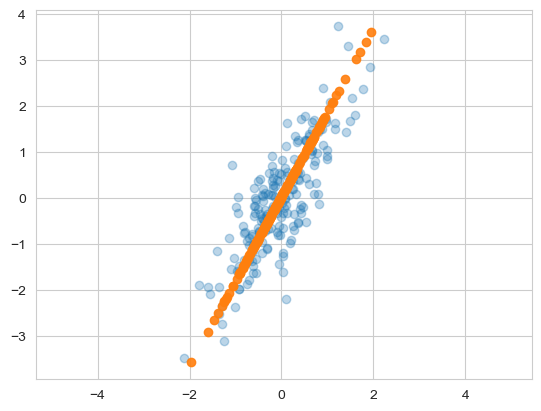

In [10]:
# inverse transform하여 그래프 그려보기

X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.axis('equal')
plt.show()


* components를 1개로 바꾸어도 2개일 때의 첫번째 벡터와 같은 값인 것을 확인할 수 있음
* 1개로 바꾼 것을 다시 inverse_transform하여 데이터를 정렬하면 해당 축에만 표현되도록 데이터가 나열된 것을 볼 수 있음

### PCA with Iris data

In [11]:
# 데이터 가져오기

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


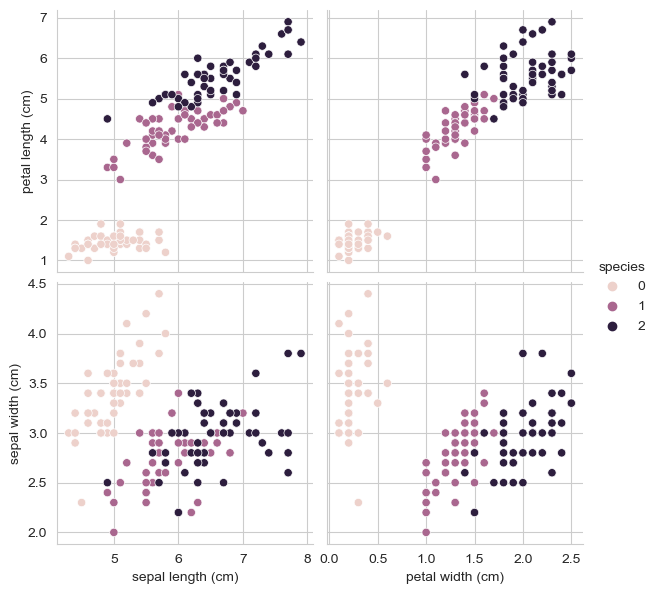

In [12]:
# pairplot 확인

sns.pairplot(iris_pd, hue='species', height=3,
             x_vars = ['sepal length (cm)', 'petal width (cm)'],
             y_vars = ['petal length (cm)', 'sepal width (cm)']);

In [13]:
# Scaler 적용 (PCA는 scaler 적용이 중요함)

from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [14]:
# PCA 결과 반환하는 함수 선언

from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [15]:
# iris standard scaled data PCA 확인

iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [16]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [17]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [18]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [19]:
# pca 결과를 pandas로 정리하는 함수 선언

def get_pd_from_pca(pca_data, cols = ['pca_component_1', 'pca_component_2']):
    return pd.DataFrame(pca_data, columns=cols)

In [20]:
# 4개의 특성 (sepal, petal lengths and widths)을 두 개의 특성으로 정리

iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head(5)

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


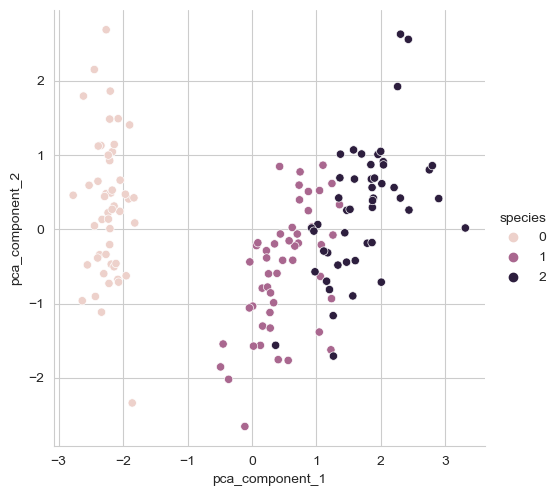

In [21]:
# pairplot 그리기

sns.pairplot(iris_pd_pca, hue='species', height=5,
             x_vars=['pca_component_1'], y_vars = ['pca_component_2']);

In [22]:
# 4개의 특성 모두 사용하여 random forest 적용시?

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)

    print('Score : ', np.mean(scores_rf))

rf_scores(iris_ss, iris.target)

Score :  0.96


In [23]:
# 2개의 특성만 적용하였을 때

pca_X = iris_pd_pca[['pca_component_1', 'pca_component_2']]

rf_scores(pca_X, iris.target)

Score :  0.9066666666666666


* 데이터 분할 대신 cross validation을 사용하여 자체적으로 데이터를 분할하여 검증하는 방식으로 간소화 하였음
* 그런데 2개의 특성만 적용하면 cross_val_score가 줄어드는 것을 볼 수 있음
  - 1, 2번 종의 구분이 모호한 곳이 있어서 그럴 수 있음
  - 혹은 PCA가 반영하는 비율이 70% (x축), 20% (y축)이라 pca 데이터가 정확도를 낮추었기 때문일 수 있음
* 중요한 것은 데이터의 경향성이 쉽사리 드러나지 않는 경우 pca를 이용하여 경향성을 좀 더 뚜렷하게 만든 뒤에 ML을 적용할 수 있다는 것

### PCA with Wine data

In [24]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [25]:
# 와인 색상 분류

wine_y = wine['color']
wine_X = wine.drop(['color'], axis =1)
wine_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
# standard scaler 적용

wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

In [27]:
# PCA 적용

pca_wine, pca = get_pca_data(wine_ss, n_components=2)
pca_wine.shape

(6497, 2)

In [28]:
# PCA 특성 값 확인 함수 선언

def print_pca_results(pca):
    print('PCA components: ', pca.components_)
    print('PCA Mean: ', pca.mean_)
    print('PCA Explained Variance: ', pca.explained_variance_)
    print('PCA Explained Variance Ratio: ', pca.explained_variance_ratio_)
    print('Sum of PCA Explained Variance Ratio: ', np.sum(pca.explained_variance_ratio_))
    

In [29]:
print_pca_results(pca)

PCA components:  [[-0.25692873 -0.39493118  0.14646061  0.31890519 -0.31344994  0.42269137
   0.47441968 -0.09243753 -0.20806957 -0.29985192 -0.05892408  0.08747571]
 [ 0.26184306  0.10519825  0.14409348  0.34258497  0.2697701   0.11117878
   0.14394753  0.55492047 -0.15292185  0.1196342  -0.49272747 -0.29660091]]
PCA Mean:  [-3.84963896e-16  1.04990153e-16  2.18729486e-17  3.49967178e-17
  1.39986871e-16 -8.74917945e-17 -6.99934356e-17 -3.55216686e-15
  2.72974399e-15 -5.42449126e-16  9.97406457e-16 -3.10595870e-16]
PCA Explained Variance:  [3.04201535 2.65026192]
PCA Explained Variance Ratio:  [0.25346226 0.22082117]
Sum of PCA Explained Variance Ratio:  0.474283427432362


In [30]:
# pca 결과 dataframe 화

pca_columns = ['PC1', 'PC2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd['color'] = wine_y.values

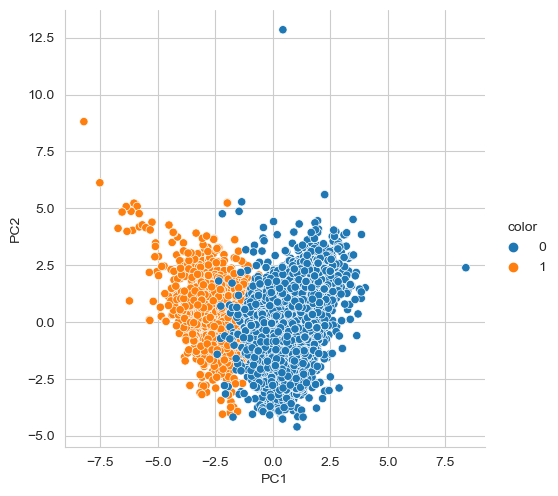

In [31]:
# pca 결과 pairplot

sns.pairplot(pca_wine_pd, hue='color', height=5,
             x_vars=['PC1'], y_vars=['PC2'])

In [32]:
rf_scores(wine_ss, wine_y)

Score :  0.9935352638124


In [33]:
pca_X = pca_wine_pd[['PC1', 'PC2']]
rf_scores(pca_X, wine_y)

Score :  0.981067803635933


In [34]:
# component 3개 사용시?

pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_pca_results(pca)

PCA components:  [[-0.25692873 -0.39493118  0.14646061  0.31890519 -0.31344994  0.42269137
   0.47441968 -0.09243753 -0.20806957 -0.29985192 -0.05892408  0.08747571]
 [ 0.26184306  0.10519825  0.14409348  0.34258497  0.2697701   0.11117878
   0.14394753  0.55492047 -0.15292185  0.1196342  -0.49272747 -0.29660091]
 [ 0.46748619 -0.27968932  0.58807557 -0.0755017   0.04676921 -0.09899801
  -0.10128143 -0.05156338 -0.40678741  0.16869128  0.21293142  0.29583773]]
PCA Mean:  [-3.84963896e-16  1.04990153e-16  2.18729486e-17  3.49967178e-17
  1.39986871e-16 -8.74917945e-17 -6.99934356e-17 -3.55216686e-15
  2.72974399e-15 -5.42449126e-16  9.97406457e-16 -3.10595870e-16]
PCA Explained Variance:  [3.04201535 2.65026192 1.64175951]
PCA Explained Variance Ratio:  [0.25346226 0.22082117 0.13679223]
Sum of PCA Explained Variance Ratio:  0.6110756621838702


In [35]:
cols = ['PC1', 'PC2', 'PC3']
pca_wine_pd2 = get_pd_from_pca(pca_wine, cols=cols)

pca_X = pca_wine_pd2[cols]
rf_scores(pca_X, wine_y)

Score :  0.9832236631728548


In [36]:
# 3d 그래프 표현

pca_wine_plot = pca_X
pca_wine_plot['color'] = wine_y.values

import plotly.express as px

fig = px.scatter_3d(pca_wine_plot, x='PC1', y='PC2', z='PC3', color = 'color', symbol='color', opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## PCA eigenface

* Olivetti data 이용

In [37]:
# 데이터 읽기 및 데이터 description 확인

from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()

print(faces_all.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\User\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for 

In [38]:
# 특정 샘플 선택, 출력되는 값은 이미지 픽셀 값

K = 20

faces = faces_all.images[faces_all.target == K]

faces

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

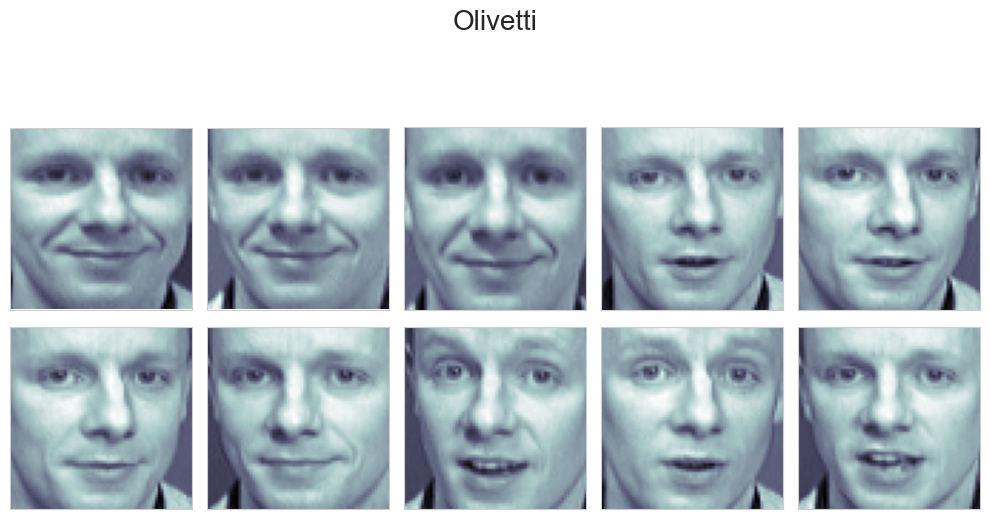

In [61]:
# 이미지 확인
# 한 인물당 10개의 사진이 있음

import matplotlib.pyplot as plt

N = 2
M = 5

fig = plt.figure(figsize=(10, 6))

plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle('Olivetti', fontsize=20)
plt.tight_layout()
plt.show()

In [62]:
# 두 개의 components 로 분석

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = faces_all.data[faces_all.target == K]
W = pca.fit_transform(X)

X_inv = pca.inverse_transform(W)

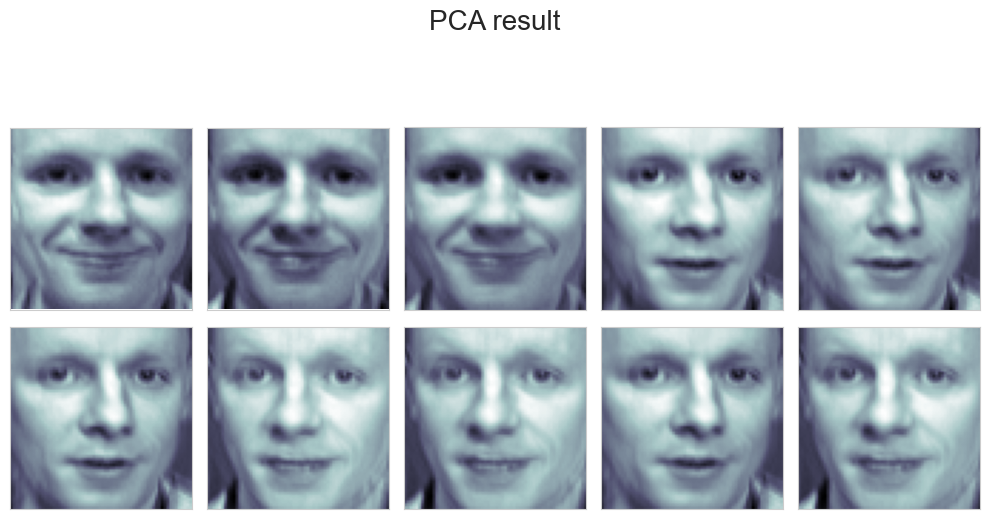

In [64]:
N = 2
M = 5

fig = plt.figure(figsize=(10, 6))

plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64, 64), cmap=plt.cm.bone) # inverse 해주면서 array 모양이 바뀌었기 때문에 reshape 해줌.
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.suptitle('PCA result', fontsize=20)
plt.tight_layout()
plt.show()

### 원점과 두 개의 eigen face

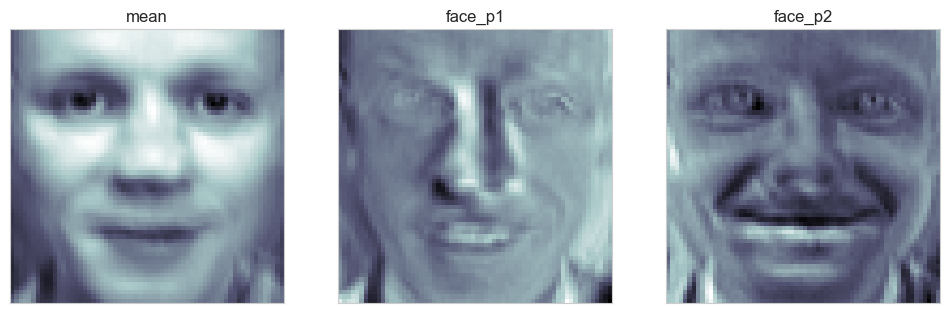

In [65]:
face_mean = pca.mean_.reshape(64, 64)

face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

plt.figure(figsize=(12, 7))
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('mean')
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_p1')
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_p2')
plt.show()

* mean이 원점이 되고 face_p1과 face_p2는 각각 x, y축처럼 생각하면 됨.
* 위 10장의 사진에 p1, p2 가중치가 어떻게 더해지느냐에 따라 원래 사진들 표현 가능

In [66]:
# 가중치 선정

import numpy as np

N = 2
M = 5

w = np.linspace(-5, 10, N*M)
w

array([-5.        , -3.33333333, -1.66666667,  0.        ,  1.66666667,
        3.33333333,  5.        ,  6.66666667,  8.33333333, 10.        ])

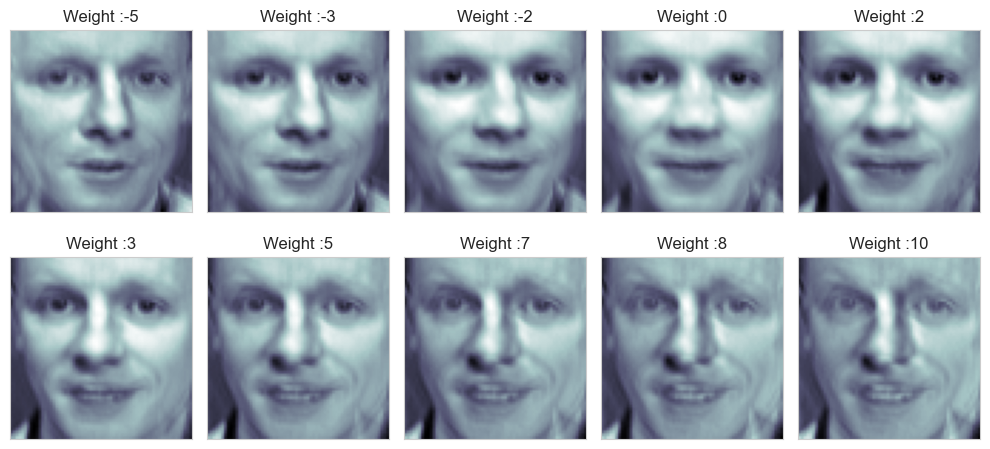

In [67]:
# 첫번째 성분 변화시켜서 사진 그려보기

fig = plt.figure(figsize=(10, 6))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax= fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p1, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('Weight :' + str(round(w[n])))

plt.tight_layout()
plt.show()

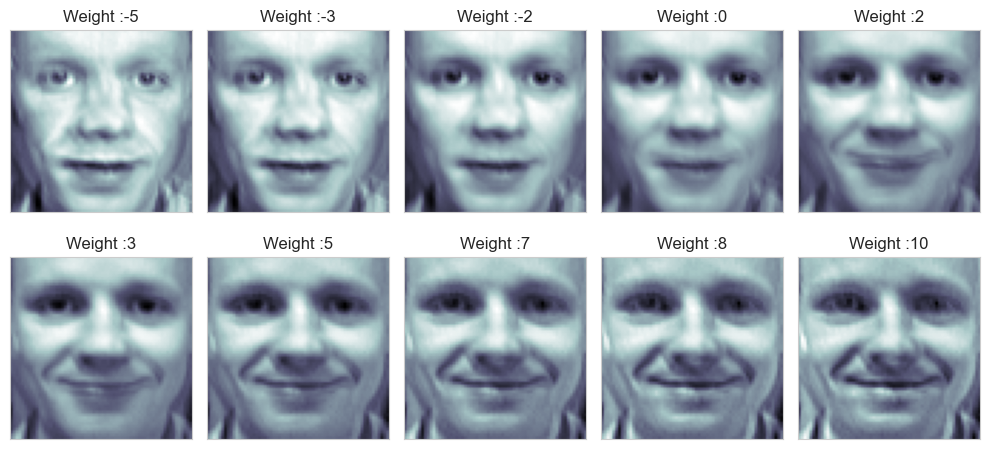

In [68]:
# 두번째 성분 변화시켜서 사진 그려보기

fig = plt.figure(figsize=(10, 6))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax= fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p2, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('Weight :' + str(round(w[n])))

plt.tight_layout()
plt.show()

In [69]:
# 두 성분 모두 변화되는 경우 확인

nx, ny = (5, 5)
x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)

w1, w2 = np.meshgrid(x, y)
w1, w2

(array([[-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ],
        [-5.  , -1.75,  1.5 ,  4.75,  8.  ]]),
 array([[-5.  , -5.  , -5.  , -5.  , -5.  ],
        [-1.75, -1.75, -1.75, -1.75, -1.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 4.75,  4.75,  4.75,  4.75,  4.75],
        [ 8.  ,  8.  ,  8.  ,  8.  ,  8.  ]]))

In [71]:
# w1, w2 reshape

w1 = w1.reshape(-1, )
w2 = w2.reshape(-1, )
w1.shape

(25,)

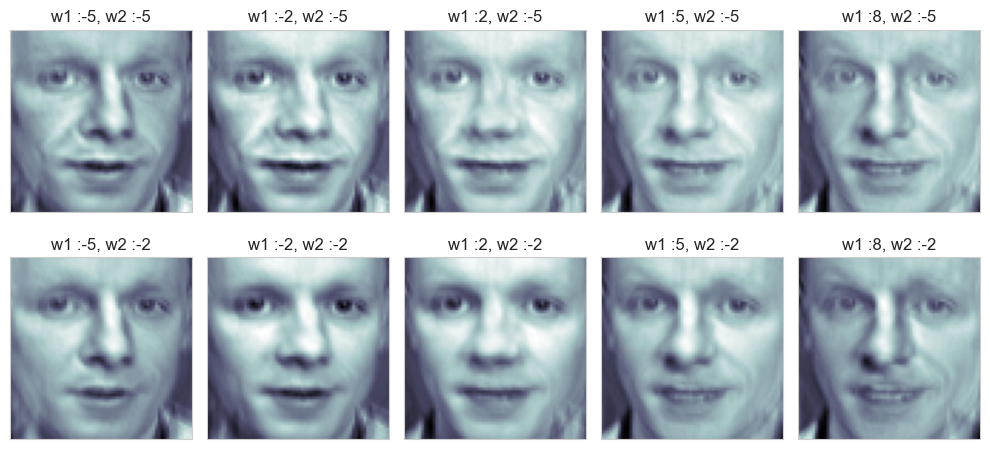

In [75]:
fig = plt.figure(figsize=(10, 6))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N*M):
    ax= fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w1[n] * face_p1 + w2[n] * face_p2, cmap=plt.cm.bone)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title('w1 :' + str(round(w1[n])) + ', w2 :' + str(round(w2[n])))

plt.tight_layout()
plt.show()